In [112]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import matplotlib.image as mpimg
import cv2
import math
import copy
from PIL import Image, ImageFilter
from scipy import misc


%matplotlib inline



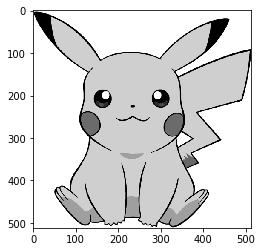

(512, 512)
N = 9


In [113]:
img = cv2.imread("pika.png",cv2.IMREAD_GRAYSCALE)
#img = cv2.imread("miss.jpg",cv2.IMREAD_GRAYSCALE)

#cv2.imshow('ImageWindow', img)
#cv2.waitKey()
#cv2.destroyAllWindows()

#blur = cv2.blur(img,(50,10))
#img = cv2.GaussianBlur(img,(5,10),0)
#plt.imshow(blur, cmap = 'gray')

#img = img.face(gray=True)
#very_blurred = ndimage.gaussian_filter(face, sigma=5)

#noisy_sigma = 500
#noisy_image = add_gaussian_noise(img, noisy_sigma)

#noised = (img + 0.2 * np.random.rand(*image.shape).astype(np.float32))
#noised = noised.clip(0,1)
#gauss_blur = cv2.GaussianBlur(noised, (7,7), 0)
#img = blur
plt.imshow(img, cmap = 'gray')
plt.show()


image = np.array(img)
num_px = image.shape[0] #square image
print(image.shape)



#my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px)).T
#print(my_image.shape)

N = math.log10(num_px) / math.log10(2)
N = int(N)
print("N = " + str(N))

In [122]:
dx = np.zeros(2**(2*N), dtype=int)
dy = np.zeros(2**(2*N), dtype=int)
x = np.zeros(2**(2*N), dtype=int)
y = np.zeros(2**(2*N), dtype=int)
dx[0:8] = [1, 0, 1, 1, 0, -1, 1, 0] 
dy[0:8] = [0, -1, 1, 0, -1, 0, -1, -1]

for n in range(2,N):
    dx[2**(2*n-1):2**(2*n)] = -dy[0:2**(2*n-1)]
    dy[2**(2*n-1):2**(2*n)] = dx[0:2**(2*n-1)]
    dx[2**(2*n-1)] = 1
    dy[2**(2*n-1)] = 1
    dx[2**(2*n):2**(2*n+1)] = dy[0:2**(2*n)]
    dy[2**(2*n):2**(2*n+1)] = -dx[0:2**(2*n)]
    

dx[2**(2*N-1):2**(2*N)] = -dx[0:2**(2*N-1)]
dy[2**(2*N-1):2**(2*N)] = -dy[0:2**(2*N-1)]


for i in range(2**(2*N)-1):
    x[i+1] = x[i] + dx[i]
    y[i+1] = y[i] + dy[i]
#plt.plot(x,y)
#plt.show()     

data = np.zeros((2**(2*N)), dtype=int)
for i in range(2**(2*N)-1):
    data[i] = image[-y[i],x[i]]

    
f = np.fft.rfft(data)
print("len(f): " + str(len(f)))
#f[100000:(len(f)-1)] = np.zeros(1)
cut = 100
alpha = 0.1/cut
for i in range(len(f)-cut, len(f)):
    #f[(len(f)-cut):(len(f)-1)] = f[(len(f)-cut):(len(f)-1)]*np.exp((0:cut)**2)*alpha
    f[i] = f[i]*np.exp(-((i-len(f)+cut)**2)*alpha)



    

len(f): 129


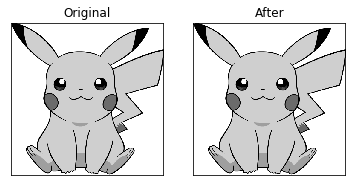

In [121]:
d  = np.fft.irfft(f, len(data))

img_back = copy.deepcopy(img)

for ii in range(2**(2*N)-1):
    img_back[-y[ii],x[ii]] = d[ii].real

#plt.imshow(img, cmap = 'gray')
#plt.show()

#plt.imshow(img_back, cmap = 'gray')
#plt.show()

plt.subplot(121),plt.imshow(img, cmap = 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray'),plt.title('After')
plt.xticks([]), plt.yticks([])
plt.show()

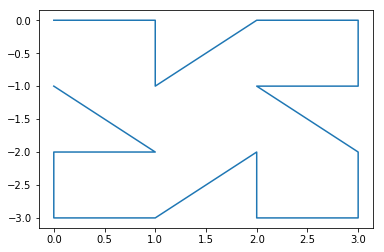

In [118]:
N = 2 # demonstration
dx = np.zeros(2**(2*N), dtype=int)
dy = np.zeros(2**(2*N), dtype=int)
x = np.zeros(2**(2*N), dtype=int)
y = np.zeros(2**(2*N), dtype=int)
dx[0:8] = [1, 0, 1, 1, 0, -1, 1, 0] 
dy[0:8] = [0, -1, 1, 0, -1, 0, -1, -1]

for n in range(2,N):
    dx[2**(2*n-1):2**(2*n)] = -dy[0:2**(2*n-1)]
    dy[2**(2*n-1):2**(2*n)] = dx[0:2**(2*n-1)]
    dx[2**(2*n-1)] = 1
    dy[2**(2*n-1)] = 1
    dx[2**(2*n):2**(2*n+1)] = dy[0:2**(2*n)]
    dy[2**(2*n):2**(2*n+1)] = -dx[0:2**(2*n)]
    

dx[2**(2*N-1):2**(2*N)] = -dx[0:2**(2*N-1)]
dy[2**(2*N-1):2**(2*N)] = -dy[0:2**(2*N-1)]


for i in range(2**(2*N)-1):
    x[i+1] = x[i] + dx[i]
    y[i+1] = y[i] + dy[i]
plt.plot(x,y)
plt.show()     




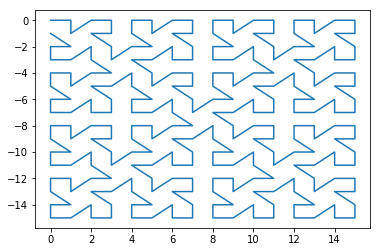

In [119]:
N = 4 # demonstration
dx = np.zeros(2**(2*N), dtype=int)
dy = np.zeros(2**(2*N), dtype=int)
x = np.zeros(2**(2*N), dtype=int)
y = np.zeros(2**(2*N), dtype=int)
dx[0:8] = [1, 0, 1, 1, 0, -1, 1, 0] 
dy[0:8] = [0, -1, 1, 0, -1, 0, -1, -1]

for n in range(2,N):
    dx[2**(2*n-1):2**(2*n)] = -dy[0:2**(2*n-1)]
    dy[2**(2*n-1):2**(2*n)] = dx[0:2**(2*n-1)]
    dx[2**(2*n-1)] = 1
    dy[2**(2*n-1)] = 1
    dx[2**(2*n):2**(2*n+1)] = dy[0:2**(2*n)]
    dy[2**(2*n):2**(2*n+1)] = -dx[0:2**(2*n)]
    

dx[2**(2*N-1):2**(2*N)] = -dx[0:2**(2*N-1)]
dy[2**(2*N-1):2**(2*N)] = -dy[0:2**(2*N-1)]


for i in range(2**(2*N)-1):
    x[i+1] = x[i] + dx[i]
    y[i+1] = y[i] + dy[i]
plt.plot(x,y)
plt.show()     

